In [46]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl
import numpy as np
from skimage.io import imread, imsave
from a72_utilities import *
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

In [69]:
cr_5L = imread("/Users/apple/Sync/Research/Alloy 72/2025-3-5 Brookhaven A72 Oxidation/Aligned images/Cr 5L aligned substack.tif")
cr_100L = imread("/Users/apple/Sync/Research/Alloy 72/2025-3-5 Brookhaven A72 Oxidation/Aligned images/Cr 100L XAS.tif")

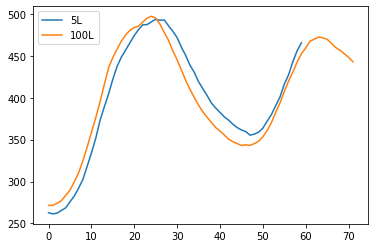

In [4]:
plt.plot(np.average(cr_5L,axis=(1,2)), label='5L')
plt.plot(np.average(cr_100L,axis=(1,2)),label='100L')
plt.legend()

(1048576, 72)


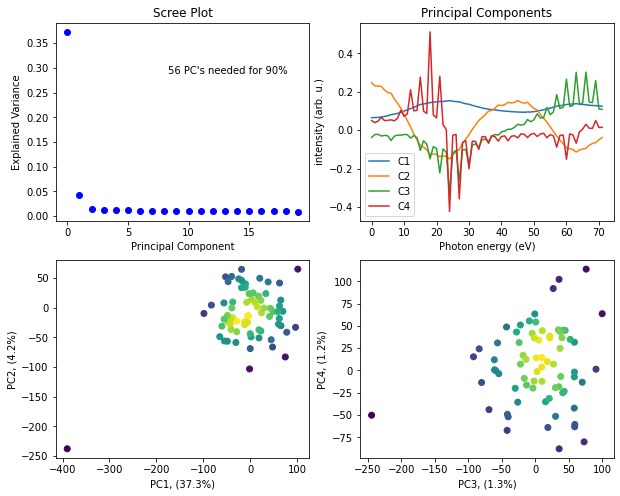

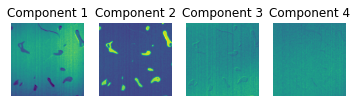

In [73]:
cr_100L_pca = PCA()
cr_100L_scores =cr_100L_pca.fit_transform(cr_100L.reshape(cr_100L.shape[0],1024*1024).T)
print(cr_100L_scores.shape)
plot_pca_results(cr_100L_pca, cr_100L_scores)
show_score_imgs(cr_100L_scores,4)
imsave("/Users/apple/Sync/Research/Alloy 72/2025-3-5 Brookhaven A72 Oxidation/Integrated intensity/cr100L_pc2.tif", make_16bit(cr_100L_scores[:,1].reshape(1024,1024)))



(1048576, 60)
(1048576, 60)


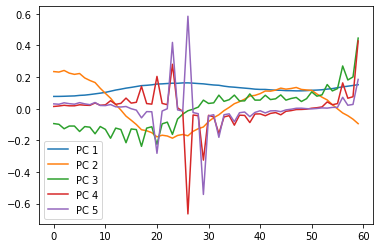

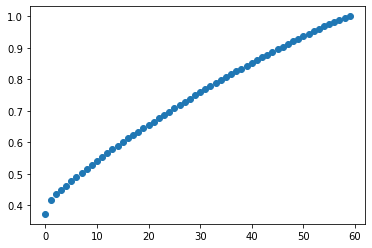

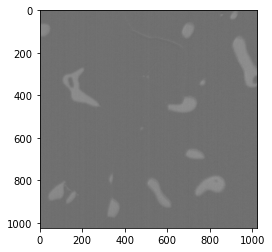

In [ ]:
cr_5L_pca = PCA()
reshaped_cr_5L = cr_5L.reshape(cr_5L.shape[0],cr_5L.shape[1]*cr_5L.shape[2]).T
print(reshaped_cr_5L.shape)
cr_scores = cr_5L_pca.fit_transform(reshaped_cr_5L)
print(cr_scores.shape)
for i in range(5):
    plt.plot(cr_5L_pca.components_[i], label=f'PC {i+1}')
plt.legend()
plt.show()

plt.scatter(range(len(cr_5L_pca.explained_variance_ratio_)),np.cumsum(cr_5L_pca.explained_variance_ratio_))
plt.show()

plt.imshow(cr_scores[:,1].reshape((cr_5L.shape[1],cr_5L.shape[2])), cmap='gray')
imsave("/Users/apple/Sync/Research/Alloy 72/2025-3-5 Brookhaven A72 Oxidation/Integrated intensity/cr5_pc2.tif", make_16bit(cr_scores[:,1].reshape((cr_5L.shape[1],cr_5L.shape[2]))))
plt.show()

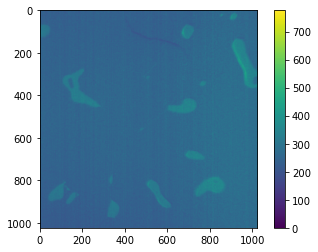

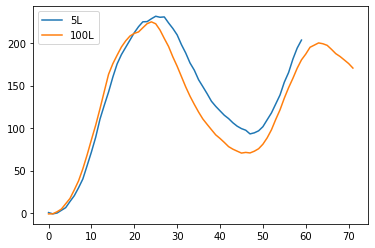

8746.0 8670.333333333334
-483.33333333333337 -3677.3333333333335


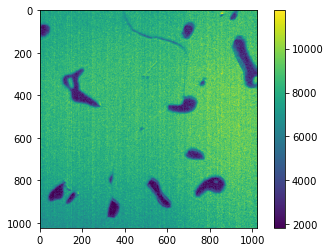

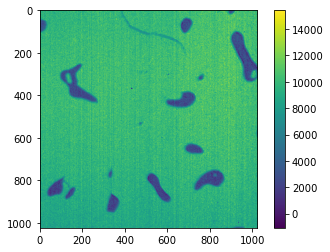

In [56]:
cr_5L_br_subtracted = (cr_5L-np.average(cr_5L[0:3,:,:],axis=0))
cr_100L_br_subtracted = (cr_100L-np.average(cr_100L[0:3,:,:],axis=0))
plt.imshow(np.average(cr_5L[0:3,:,:],axis=0))
plt.colorbar()
plt.show()
plt.plot(np.average(cr_5L-np.average(cr_5L[0:3,:,:],axis=0),axis=(1,2)), label='5L')
plt.plot(np.average(cr_100L-np.average(cr_100L[0:3,:,:],axis=0),axis=(1,2)), label='100L')
plt.legend()

plt.show()
print(np.max(cr_5L_br_subtracted), np.max(cr_100L_br_subtracted))
print(np.min(cr_5L_br_subtracted), np.min(cr_100L_br_subtracted))

cr5_integrated = np.sum(cr_5L_br_subtracted, axis=0)
cr100_integrated = np.sum(cr_100L_br_subtracted, axis=0)
plt.imshow(cr5_integrated,vmin=np.percentile(cr5_integrated,1), vmax=np.percentile(cr5_integrated,99))
plt.colorbar()
plt.show()
plt.imshow(cr100_integrated,vmin=np.percentile(cr100_integrated,.1), vmax=np.percentile(cr100_integrated,99.9))
plt.colorbar()
plt.show()
imsave("/Users/apple/Sync/Research/Alloy 72/2025-3-5 Brookhaven A72 Oxidation/Integrated intensity/cr5_integrated.tif", make_16bit(cr5_integrated))
imsave("/Users/apple/Sync/Research/Alloy 72/2025-3-5 Brookhaven A72 Oxidation/Integrated intensity/cr100_integrated.tif", make_16bit(cr100_integrated))



In [74]:
cr5L_L21_mask = imread("/Users/apple/Sync/Research/Alloy 72/2025-3-5 Brookhaven A72 Oxidation/Masks/cr5_L21_mask_from_pc2.png")
cr100L_l21_mask = imread("/Users/apple/Sync/Research/Alloy 72/2025-3-5 Brookhaven A72 Oxidation/Masks/cr100L_L21_mask_from_pc2.png")

<AxesSubplot:>

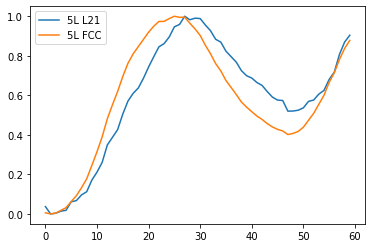

In [89]:
cr_avg_spectra = pd.DataFrame()
cr_avg_spectra["5L L21"] = normalize_array(np.nanmean(mask_subtract_arr(cr_5L,cr5L_L21_mask),axis=(1,2)))
cr_avg_spectra["5L FCC"] = normalize_array(np.nanmean(mask_subtract_arr(cr_5L,np.invert(cr5L_L21_mask)),axis=(1,2)))
# cr_avg_spectra.to_clipboard()
# cr_avg_spectra["100L L21"] = normalize_array(np.nanmean(mask_subtract_arr(cr_100L,cr100L_l21_mask),axis=(1,2)))
# cr_avg_spectra["100L FCC"] = normalize_array(np.nanmean(mask_subtract_arr(cr_100L,np.invert(cr100L_l21_mask)),axis=(1,2)))
cr_avg_spectra.to_clipboard()

cr_avg_spectra.plot()

# plt.plot(np.nanmean(mask_subtract_arr(cr_5L,cr5L_L21_mask),axis=(1,2)),label="5L L21")
# plt.plot(np.nanmean(mask_subtract_arr(cr_5L,np.invert(cr5L_L21_mask)),axis=(1,2)),label="5L FCC")
# plt.plot(np.nanmean(mask_subtract_arr(cr_100L,cr100L_l21_mask),axis=(1,2)),label="100L L21")
# plt.plot(np.nanmean(mask_subtract_arr(cr_100L,np.invert(cr100L_l21_mask)),axis=(1,2)),label="100L FCC")